In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [10]:
data_path = "../../data/02_processed/02_prod/"

In [11]:
os.system("cat " + data_path + "prod_1_header.txt")

# This file was created Thu Nov 21 12:02:31 2024
# Created by:
#                      :-) GROMACS - gmx energy, 2021.4 (-:
# 
# Executable:   /usr/local/gromacs/bin/gmx
# Data prefix:  /usr/local/gromacs
# Working dir:  /home/giacomo/comp_bio/cbp_final/data/01_raw/02_NPT/01_npt_1
# Command line:
#   gmx energy -f step5_production.edr -o step5_npt_1.xvg
# gmx energy is part of G R O M A C S:
#
# Gromacs Runs On Most of All Computer Systems
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(K), (bar), (), (kg/m^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Temperature"
@ s1 legend "Pressure"
@ s2 legend "Constr. rmsd"
@ s3 legend "Density"


0

In [13]:
tem_df = pd.read_csv(data_path + "prod_1_raw.xvg", header = None, sep = " ", skipinitialspace=True)
#tem_df = tem_df.tail(-5000)
tem_df

,0,1,2,3,4
0,0.0,309.536102,451.037628,0.000003,1033.471680
1,2.0,307.730316,345.560638,0.000003,1029.712769
2,4.0,308.960693,38.542866,0.000003,1032.911621
3,6.0,309.004059,120.904205,0.000003,1032.478760
4,8.0,308.050568,-7.213339,0.000003,1030.751831
...,...,...,...,...,...
11996,23992.0,310.788239,-69.622665,0.000003,1032.233887
11997,23994.0,306.981567,95.620300,0.000003,1031.616577
11998,23996.0,307.369568,5.320657,0.000003,1032.228638
11999,23998.0,310.400513,60.545551,0.000003,1031.656982


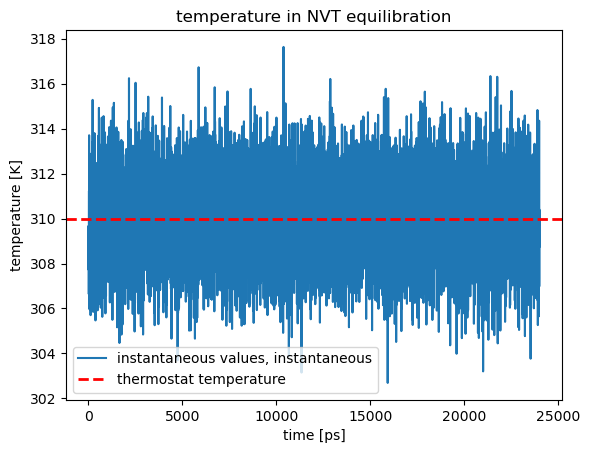

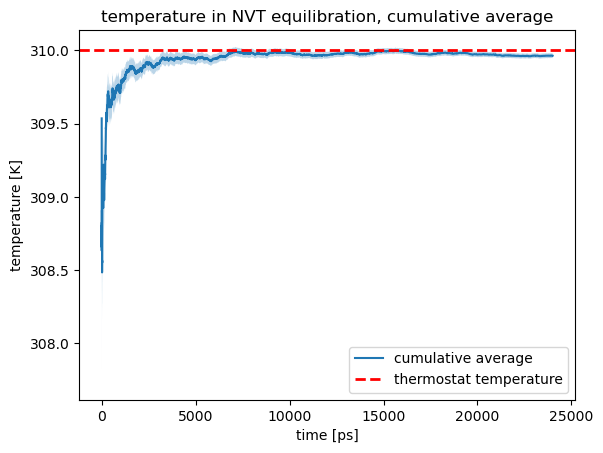

In [14]:
plt.plot(tem_df[0], tem_df[1], label = "instantaneous values, instantaneous")
# plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
plt.title("temperature in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

# plt.plot(tem_df[0], tem_df[1], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[1].expanding().mean(), label = "cumulative average")
errors = np.sqrt(tem_df[1].expanding().var() / tem_df[1].expanding().count())
plt.fill_between(tem_df[0], tem_df[1].expanding().mean() + errors, tem_df[1].expanding().mean() - errors, alpha=0.3)
plt.title("temperature in NVT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

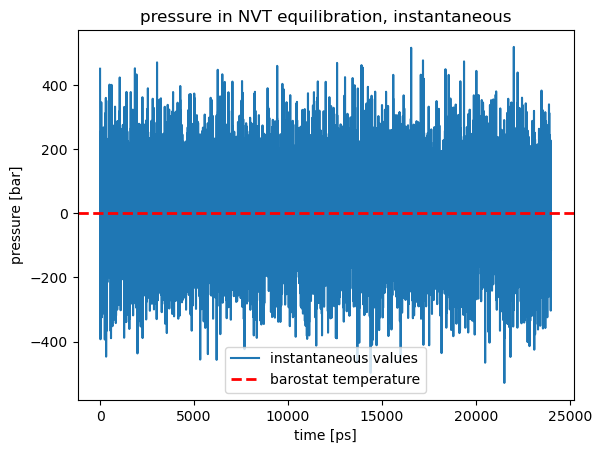

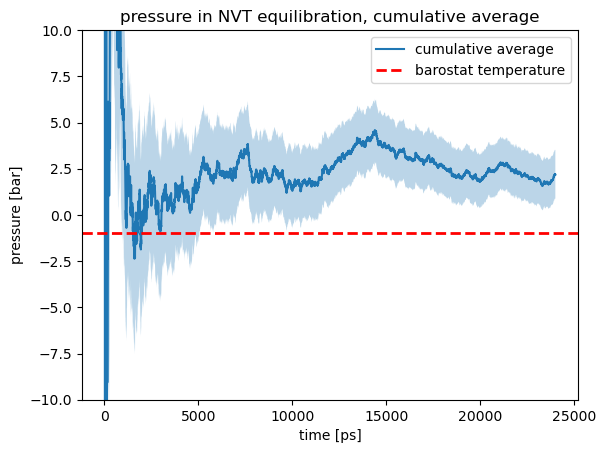

In [15]:
plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
# plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
plt.title("pressure in NVT equilibration, instantaneous")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.show()

# plt.plot(tem_df[0], tem_df[2], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[2].expanding().mean(), label = "cumulative average")
errors = np.sqrt(tem_df[2].expanding().var() / tem_df[2].expanding().count())
plt.fill_between(tem_df[0], tem_df[2].expanding().mean() + errors, tem_df[2].expanding().mean() - errors, alpha=0.3)
plt.title("pressure in NVT equilibration, cumulative average")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat temperature")
plt.legend()
plt.ylim(-10,10)
plt.show()

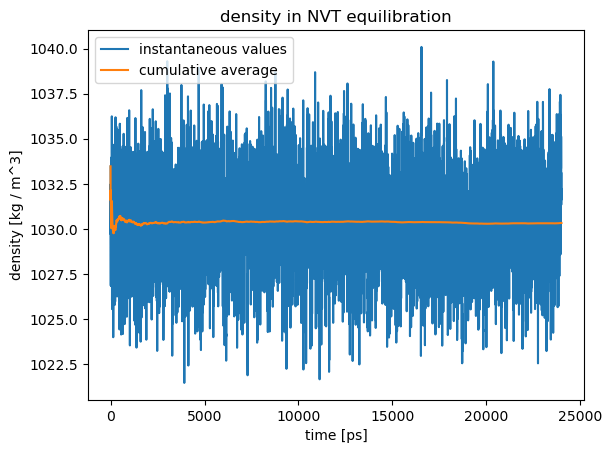

In [17]:
plt.plot(tem_df[0], tem_df[4], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[4].expanding().mean(), label = "cumulative average")
plt.title("density in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("density [kg / m^3]")
# plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()